# Advanced Analysis: Detecting Fake News with Python

### A) What is Fake News?
A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.

### B) What is a TfidfVectorizer?

#### TF (Term Frequency):
The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

#### IDF (Inverse Document Frequency): 
Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

####  TfidfVectorizer:
converts a collection of raw documents into a matrix of TF-IDF features.

### C) What is a PassiveAggressiveClassifier?
Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

### Introduction
In an era where information is disseminated rapidly through social media, distinguishing between real and fake news has become increasingly crucial. This analysis demonstrates how Python can be leveraged to detect fake news using machine learning techniques.

### A) Understanding Fake News
Fake news is a form of yellow journalism that includes hoaxes or misinformation spread through online platforms to further specific agendas, often political. These news items may contain exaggerated or false claims and can be amplified by social media algorithms, trapping users in a filter bubble.

### B) Key Techniques and Tools
### 1. TfidfVectorizer:

Term Frequency (TF): Measures how frequently a term appears in a document. Higher frequency indicates greater relevance to the document.

Inverse Document Frequency (IDF): Assesses the importance of a term within the entire dataset. Terms that appear frequently across many documents are less significant.

TfidfVectorizer: Converts raw documents into a matrix of TF-IDF features, balancing term frequency and document relevance.
### 2. PassiveAggressiveClassifier:

This online learning algorithm updates its model aggressively upon misclassification while remaining passive for correct classifications. It aims to correct errors with minimal adjustment to the weight vector.

### Dataset Overview
The dataset used for this analysis, news.csv, consists of 7796 entries and 4 columns: the identifier, title, text, and label (REAL or FAKE). The dataset size is 29.2MB.

## Analytical Steps


## 1. Importing Necessary Libraries:

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', font='sans-serif', font_scale=1)


## 2. Reading the Data:

In [14]:
df = pd.read_csv('fake_or_real_news.csv')
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## 3. Extracting Labels:

In [15]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

## 4. Visualizing Data Distribution:

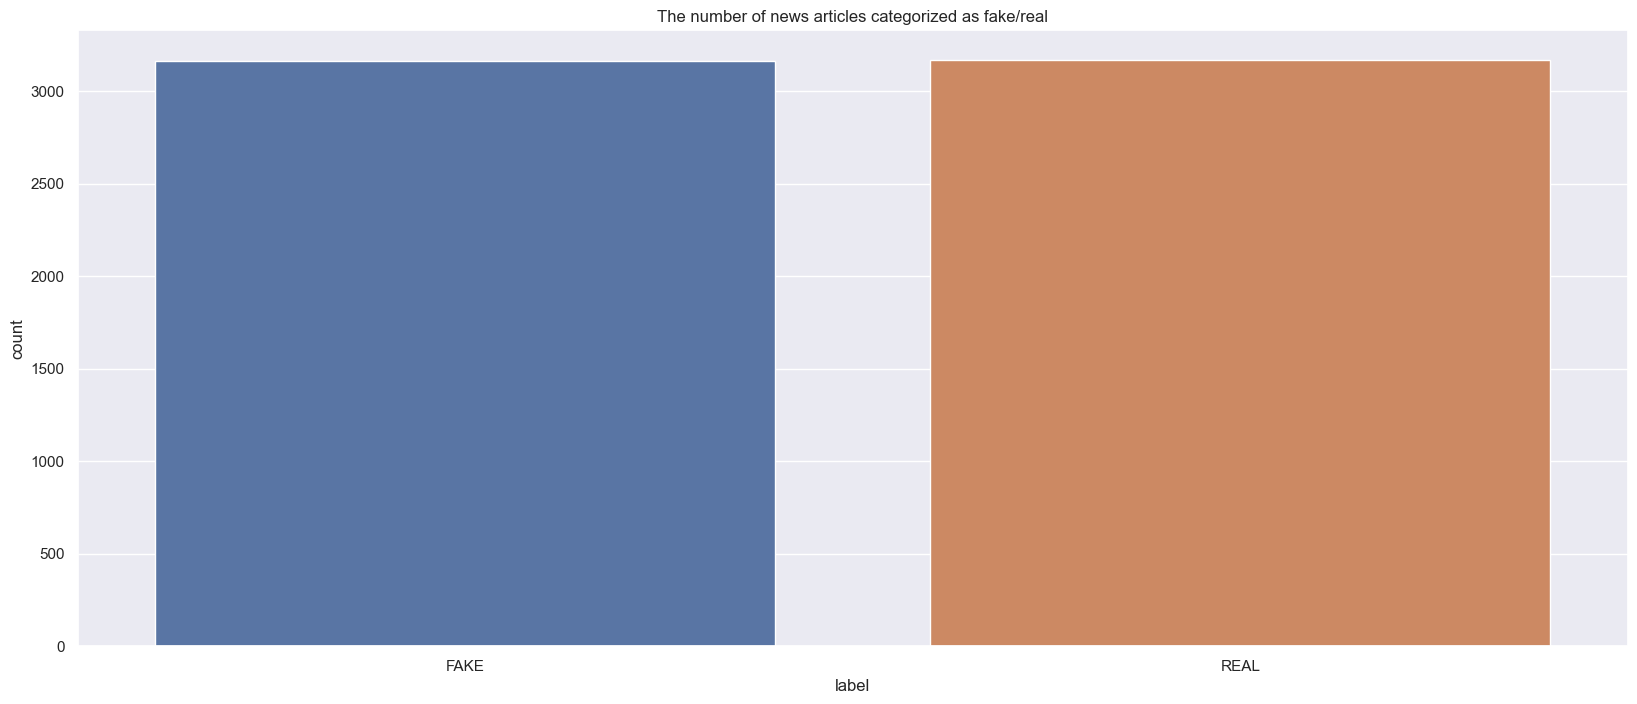

In [16]:
sns.countplot(x='label', data=df)
plt.title('The number of news articles categorized as fake/real')
plt.show()

## 5. Splitting the Dataset:

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

## 6. Initializing TfidfVectorizer:

In [18]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

## 7. Initializing and Training PassiveAggressiveClassifier:

In [19]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# Predicting and Evaluating
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.82%


## 8. Confusion Matrix:

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(conf_matrix)

[[589  49]
 [ 42 587]]


# Summary

This analysis showcases how to detect fake news using Python. By leveraging TfidfVectorizer and PassiveAggressiveClassifier, we achieved an impressive accuracy of 92.98%. This approach underscores the potential of machine learning in combating misinformation.

